In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
import matplotlib
import matplotlib.pyplot as plt



# Libraries for displying the data. 
from IPython.core.display import HTML 
from ipywidgets import interact
from IPython.display import display
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#Dataset
downloaded = drive.CreateFile({'id':"12f9gd7u5hGDwWEZgOd-O9iMkM6lE9vF-"})   # replace the id with id of file you want to access
downloaded.GetContentFile('stock_prices_sample.csv')        # replace the file name with your file
#Dataset
downloaded = drive.CreateFile({'id':"1jJapq3dnv8iyMHtxJSp-hRJl8E1rCrUu"})   # replace the id with id of file you want to access
downloaded.GetContentFile('data.csv')        # replace the file name with your file

In [0]:
stock_prices = pd.read_csv('stock_prices_sample.csv')

In [10]:
stock_prices

,TICKER,FIGI,DATE,TYPE,FREQUENCY,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_OPEN,ADJ_HIGH,ADJ_LOW,ADJ_CLOSE,ADJ_VOLUME,ADJ_FACTOR,EX_DIVIDEND,SPLIT_RATIO
0,GEF,BBG000BLFQH8,2013-01-04,EOD,daily,46.31,47.6198,46.23,47.37,248000.0,38.517220,39.606614,38.450681,39.398849,248000.0,NaN,0.0,1.0
1,GEF,BBG000BLFQH8,2013-01-03,EOD,daily,46.43,46.5200,46.14,46.48,131300.0,38.617027,38.691882,38.375826,38.658613,131300.0,NaN,0.0,1.0
2,GEF,BBG000BLFQH8,2013-01-02,EOD,daily,45.38,46.5400,45.16,46.41,184900.0,37.743715,38.708516,37.560735,38.600392,184900.0,NaN,0.0,1.0
3,GF,BBG000C3C6S2,2018-06-05,Intraday,daily,18.86,18.9100,18.87,18.87,10000.0,18.860000,18.910000,18.870000,18.870000,10000.0,NaN,0.0,1.0
4,GF,BBG000C3C6S2,2018-06-04,EOD,daily,18.86,18.8900,18.79,18.81,39095.0,18.860000,18.890000,18.790000,18.810000,39095.0,NaN,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,GF,BBG000C3C6S2,2014-06-27,EOD,daily,18.63,18.6300,18.51,18.61,28400.0,11.717560,11.717560,11.642085,11.704981,28400.0,NaN,0.0,1.0
995,GF,BBG000C3C6S2,2014-06-26,EOD,daily,18.52,18.5901,18.42,18.53,60000.0,11.648374,11.692464,11.585478,11.654664,60000.0,NaN,0.0,1.0
996,GF,BBG000C3C6S2,2014-06-25,EOD,daily,18.66,18.7200,18.59,18.60,171700.0,11.736429,11.774167,11.692402,11.698691,171700.0,NaN,0.0,1.0
997,GF,BBG000C3C6S2,2014-06-24,EOD,daily,18.91,18.9500,18.83,18.83,35200.0,11.893669,11.918828,11.843352,11.843352,35200.0,NaN,0.0,1.0


In [0]:
stock_prices['DATE'] = pd.to_datetime(stock_prices["DATE"])
stock_prices['date'] = stock_prices['DATE']
stock_prices = stock_prices.sort_values(by="DATE")
stock_prices.set_index("DATE", inplace = True) 
stock_prices['Year']=stock_prices.index.year
stock_prices = stock_prices[stock_prices.Year != 2013]

In [12]:
stock_prices

,TICKER,FIGI,TYPE,FREQUENCY,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_OPEN,ADJ_HIGH,ADJ_LOW,ADJ_CLOSE,ADJ_VOLUME,ADJ_FACTOR,EX_DIVIDEND,SPLIT_RATIO,date,Year
DATE,,,,,,,,,,,,,,,,,,,
2013-01-02,GEF,BBG000BLFQH8,EOD,daily,45.38,46.5400,45.16,46.41,184900.0,37.743715,38.708516,37.560735,38.600392,184900.0,NaN,0.0,1.0,2013-01-02,2013
2013-01-03,GEF,BBG000BLFQH8,EOD,daily,46.43,46.5200,46.14,46.48,131300.0,38.617027,38.691882,38.375826,38.658613,131300.0,NaN,0.0,1.0,2013-01-03,2013
2013-01-04,GEF,BBG000BLFQH8,EOD,daily,46.31,47.6198,46.23,47.37,248000.0,38.517220,39.606614,38.450681,39.398849,248000.0,NaN,0.0,1.0,2013-01-04,2013


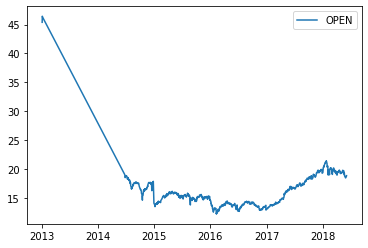

In [8]:
sns.lineplot(data=stock_prices['OPEN'], label="OPEN") 

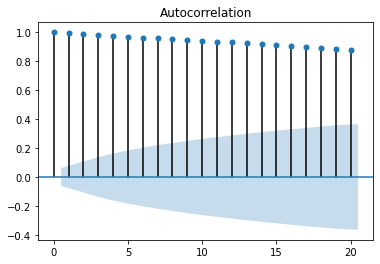

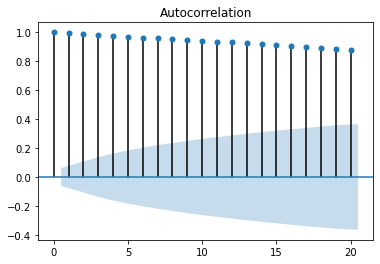

In [0]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(stock_prices['OPEN'] , lags = 20 )

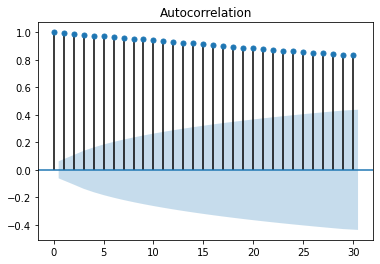

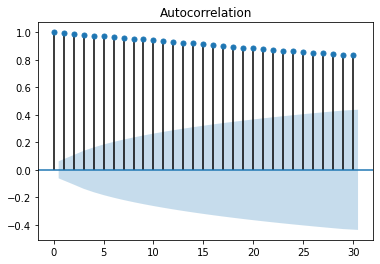

In [0]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(stock_prices['HIGH'])

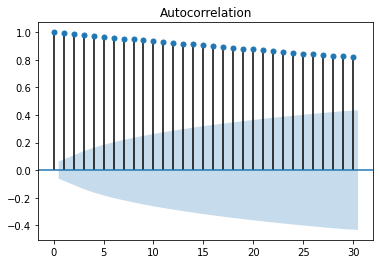

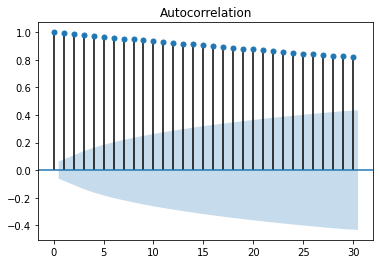

In [0]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(stock_prices['LOW'])

In [0]:
# Python
import pandas as pd
from fbprophet import Prophet

In [0]:
# Prophet requires columns ds (Date) and y (value)
stock_prices = stock_prices.rename(columns={'date': 'ds', 'OPEN': 'y'})

In [0]:
# Python
m = Prophet()
m.fit(stock_prices)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
# Python
future = m.make_future_dataframe(periods=5)
future.tail()

,ds
996,2018-06-06
997,2018-06-07
998,2018-06-08
999,2018-06-09
1000,2018-06-10


In [0]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
996,2018-06-06,19.740293,19.090181,20.372274
997,2018-06-07,19.734782,19.078631,20.408658
998,2018-06-08,19.746802,19.097112,20.377028
999,2018-06-09,19.673444,18.998819,20.408151
1000,2018-06-10,19.676181,19.046746,20.305219


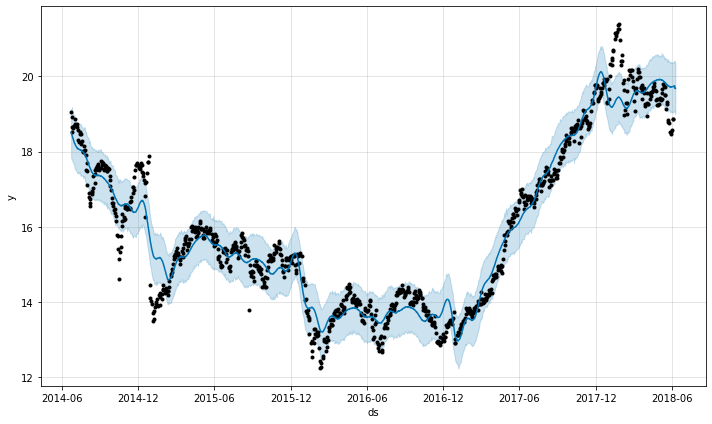

In [0]:
fig1 = m.plot(forecast)

In [0]:
def mspe(y_true , y_pred):
  return np.mean(np.abs((np.array(y_true)-np.array(y_pred))/np.array(y_true)))*100 

In [0]:
from fbprophet.diagnostics import cross_validation

In [0]:
cv_results = cross_validation(m , horizon='30 days')

INFO:fbprophet:Making 70 forecasts with cutoffs between 2015-07-06 00:00:00 and 2018-05-06 00:00:00


In [0]:
mspe_baseline = mspe(cv_results.y , cv_results.yhat)
print(mspe_baseline)

5.341483717428486
